In [1]:
# Importing the Library
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
warnings.filterwarnings('ignore')
import scipy

In [5]:
data=pd.read_csv("./data/gapmiderData.csv")
#Our Interest of Columns are "employrate","incomeperperson","suicideper100th"
dataInterest=data[["employrate","incomeperperson","suicideper100th"]]
dataInterest["employrate"]=pd.to_numeric(dataInterest["employrate"],errors='coerce')
dataInterest["incomeperperson"]=pd.to_numeric(dataInterest["incomeperperson"],'coerce')
dataInterest["suicideper100th"]=pd.to_numeric(dataInterest["suicideper100th"],'coerce')
dataInterest.shape

(213, 3)

In [6]:
dataInterest=dataInterest.dropna()
print(dataInterest.shape)


(163, 3)


In [11]:
print("Minimum Value for Income per person ", dataInterest["incomeperperson"].min())
print("Maximum Value for Income per person ", dataInterest["incomeperperson"].max())

Minimum Value for Income per person  103.775857241166
Maximum Value for Income per person  52301.5871789984


In [13]:
# let's check if the income variable affects relationship between employrate and suiciderate
dataInterest["INCOMECATEGORY"]=pd.cut(dataInterest["incomeperperson"],[100,1000,3000,5500],labels=["Low","Medium","High"])

In [14]:
dataInterest["INCOMECATEGORY"].value_counts()

Low       52
Medium    40
High      18
Name: INCOMECATEGORY, dtype: int64

In [18]:
dataLowIncome=dataInterest[dataInterest["INCOMECATEGORY"]=="Low"]
dataMediumIncome=dataInterest[dataInterest["INCOMECATEGORY"]=="Medium"]
dataHighIncome=dataInterest[dataInterest["INCOMECATEGORY"]=="High"]

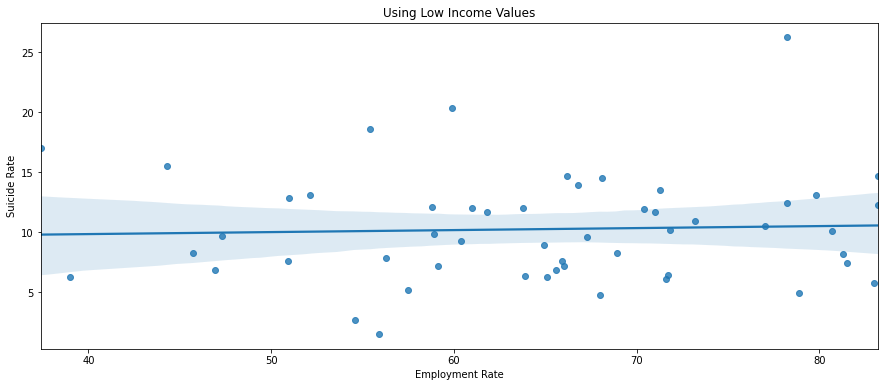

In [21]:
fig=plt.subplots(figsize=(15,6))
sns.regplot(x=dataLowIncome["employrate"],y=dataLowIncome["suicideper100th"])
plt.xlabel("Employment Rate")
plt.ylabel("Suicide Rate");
plt.title("Using Low Income Values");

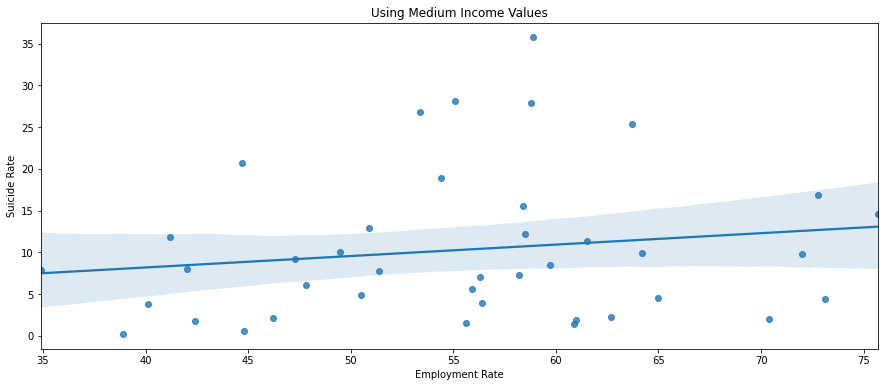

In [22]:
fig=plt.subplots(figsize=(15,6))
sns.regplot(x=dataMediumIncome["employrate"],y=dataMediumIncome["suicideper100th"])
plt.xlabel("Employment Rate")
plt.ylabel("Suicide Rate");
plt.title("Using Medium Income Values");

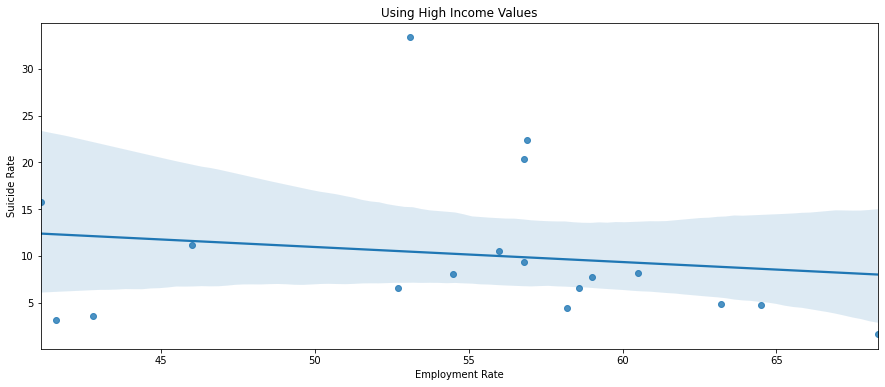

In [24]:
fig=plt.subplots(figsize=(15,6))
sns.regplot(x=dataHighIncome["employrate"],y=dataHighIncome["suicideper100th"])
plt.xlabel("Employment Rate")
plt.ylabel("Suicide Rate");
plt.title("Using High Income Values");

####  Let's check for the results using Pearson's Test

In [26]:
results=scipy.stats.pearsonr(dataLowIncome["employrate"],dataLowIncome["suicideper100th"])
print("Pearson's r value ",results[0])
print("Pearson's test p value ",results[1])

Pearson's r value  0.04354660583757305
Pearson's test p value  0.7592003904437366


In [27]:
results=scipy.stats.pearsonr(dataMediumIncome["employrate"],dataMediumIncome["suicideper100th"])
print("Pearson's r value ",results[0])
print("Pearson's test p value ",results[1])

Pearson's r value  0.1576743084039084
Pearson's test p value  0.33120272772852277


In [28]:
results=scipy.stats.pearsonr(dataHighIncome["employrate"],dataHighIncome["suicideper100th"])
print("Pearson's r value ",results[0])
print("Pearson's test p value ",results[1])

Pearson's r value  -0.1541845119411851
Pearson's test p value  0.5412935215717756


In [30]:
# So it's evident from the three plots and tests as well that moderator variable i.e income variable doesn't play a role 
# in adding signifcance to the suiciderate